# Plot the validation result

## Load the csv file

The total lines is  6
step ['0', '1', '2', '3', '4']
steplast ['0', '1', '2', '3']
ca ['0.07100000000000001', '-0.040999999999999995', '-0.016600000000000004', '0.0', '0']
v1 ['0.0', '0.4311898350715637', '0.8298599421977997', '1.2289166152477264', '1.6241233944892883']
v2 ['0.0', '0.04945945739746094', '0.1276436746120453', '0.20548641681671143', '0.2867297828197479']
v3 ['0.0', '-0.5203213691711426', '-0.9766113460063934', '-1.4336625337600708', '-1.883133202791214']
v4 ['0.0', '0.2008177787065506', '0.36973124742507935', '0.5390239804983139', '0.7045396268367767']
<class 'str'>
<class 'float'>


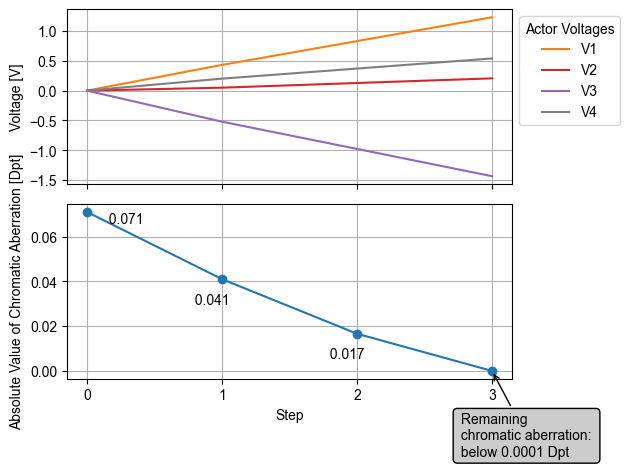

In [18]:
import matplotlib.pyplot as plt
import csv
import matplotlib as mpl
from pathlib import Path
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(2,1, sharex= True)

v1 = []
v2 = []
v3 = []
v4 = []
ca = []
step=[]

with open('./test_results_with_sample/results_PPO_3_Thyroid4_2.csv','r') as csvfile:
    #Best: './test_results_with_sample/results_PPO_3_Thyroid4_2.csv'
    lines = csv.reader(csvfile, delimiter=',')
    filename='./test_results_with_sample/results_PPO_3_Thyroid4_2.csv'
    #Best: './test_results_with_sample/results_PPO_3_Thyroid4_2.csv'
    total = len(open(filename).readlines())
    print('The total lines is ',total)
    #Don't need the first and last rows
    i=0
    for row in lines:
        if  i==total-1:
            ca.append('0')
        elif i==0:
            i=i+1
            continue
        else:
            ca.append(row[1])
        step.append(row[0])
        v1.append(row[2])
        v2.append(row[3])
        v3.append(row[4])
        v4.append(row[5])
        i=i+1

print('step',step)
print('steplast',step[:-1])
print('ca',ca)
print('v1',v1)
print('v2',v2)
print('v3',v3)
print('v4',v4)
print(type(ca[3]))
#v1,v2,v3,v4 list of str
for i in range(len(ca)):
    ca[i]=abs(float(ca[i]))

print(type(ca[3]))
for i in range(len(v1)):
    v1[i]=float(v1[i])
for i in range(len(v2)):
    v2[i]=float(v2[i])
for i in range(len(v3)):
    v3[i]=float(v3[i])
for i in range(len(v4)):
    v4[i]=float(v4[i])

ax[0].set_ylabel('Voltage [V]')
ax[0].plot(step[:-1], v1[:-1], label='V1', color = 'tab:orange')
ax[0].plot(step[:-1], v2[:-1], label='V2', color = 'tab:red')
ax[0].plot(step[:-1], v3[:-1], label='V3', color = 'tab:purple')
ax[0].plot(step[:-1], v4[:-1], label='V4', color = 'tab:gray')
ax[0].grid(True)
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1,1), title ='Actor Voltages')

ax[1].set_ylabel('Absolute Value of Chromatic Aberration [Dpt]')
ax[1].tick_params(axis='y')
ax[1].plot(step[:-1], ca[:-1], color = 'tab:blue', marker='o')
ax[1].grid(True)
ax[1].set_xlabel('Step')

label1= "  {:.3f}".format(ca[0])
ax[1].annotate(label1,
               xy=(step[0], float(ca[0])), xycoords = 'data',
               xytext=(10,0),
               textcoords='offset points',
               #bbox=dict(boxstyle="round", fc="0.8"),
               #arrowprops=dict(arrowstyle='->'),
               horizontalalignment='left',
               verticalalignment = 'top')

label2= "  {:.3f}".format(ca[1])
ax[1].annotate(label2,
               xy=(step[1], float(ca[1])), xycoords = 'data',
               xytext=(-25,-10), textcoords='offset points',
               #bbox=dict(boxstyle="round", fc="0.8"),
               #arrowprops=dict(arrowstyle='->'),
               horizontalalignment='left',
               verticalalignment = 'top')

label3= "  {:.3f}".format(ca[2])
ax[1].annotate(label3,
               xy=(step[2], float(ca[2])), xycoords = 'data',
               xytext=(-25,-10), textcoords='offset points',
               #bbox=dict(boxstyle="round", fc="0.8"),
               #arrowprops=dict(arrowstyle='->'),
               horizontalalignment='left',
               verticalalignment = 'top')


label = " Remaining \n chromatic aberration: \n below 0.0001 Dpt"
ax[1].annotate(label,
               xy=(step[-2], float(ca[-2])), xycoords = 'data',
               xytext=(-25,-30), textcoords='offset points',
               bbox=dict(boxstyle="round", fc="0.8"),
               arrowprops=dict(arrowstyle='->'),
               horizontalalignment='left',
               verticalalignment = 'top')


fig.tight_layout()
fig.align_ylabels()

Path("validationPlot").mkdir(parents=True, exist_ok=True)
image_name = f'./validationPlot/abs_PPO_3_Thyroid4_2_withNewMsg.svg'
fig.savefig(image_name, dpi=300, bbox_inches ='tight', transparent = True)
#fig.savefig('validation_result.png', dpi=300, bbox_inches ='tight', transparent = True)